In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr

from keras.models import load_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Activation

import import_ipynb
import libs

Using TensorFlow backend.


importing Jupyter notebook from libs.ipynb


In [2]:
X_train,y_train,X_test,y_test,data_hr1,sc1=libs.get_data(k2=12)

print("X_train",X_train.shape,np.min(X_train),np.max(X_train))
print("y_train",y_train.shape,np.min(y_train),np.max(y_train))
print("X_test",X_test.shape,np.min(X_test),np.max(X_test))
print("y_test",y_train.shape,np.min(y_test),np.max(y_test))
print("data_hr1",data_hr1.shape,np.min(data_hr1),np.max(data_hr1))

X=[]
y=[]
for i in range(1,13):
    _,_,X_t,y_t,_,_=libs.get_data(k2=i)
    X.append(X_t)
    y.append(y)

/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


X_train (552, 72, 23) 0.0 1.0000000000000002
y_train (552, 24, 23) 0.0 1.0
X_test (7, 72, 23) 0.0 1.0
y_test (552, 24, 23) 0.0 1.0
data_hr1 (984, 1) 0.0 76400.0


/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data 

In [3]:
model=[]
pred=[]
nr=12
for i in range(nr):
    model.append(load_model('model/corr_selection/model'+str(i+1)+'.h5'))
    pred1= model[i].predict(X[i])
    pred1=pred1.reshape(-1,1)
    pred1 = sc1.inverse_transform(pred1)
    pred1=pred1[:,0]
    pred.append(pred1[-24*4:])
pred=np.array(pred)

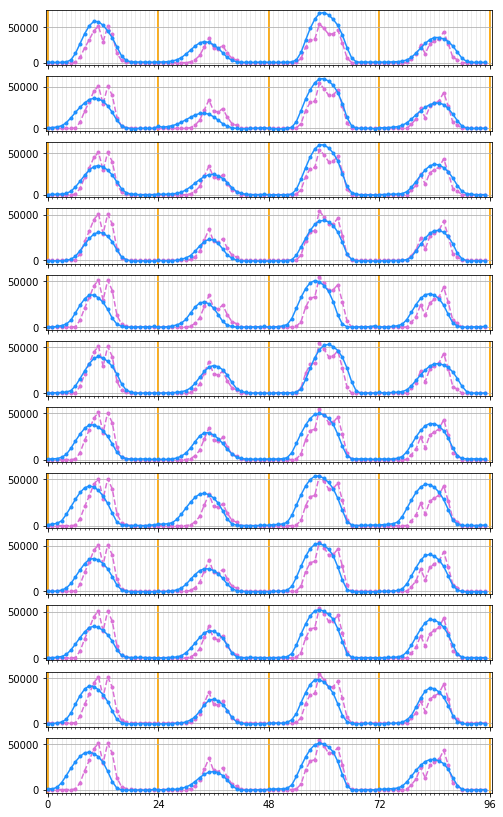

In [44]:
fig = plt.figure(figsize=(8,1.2*nr))                                                               
#ax = fig.add_subplot(1,1,1)                                                      
for i in range(nr):
    #pred1= model[i].predict(X_test[:,:,:2+(i+1)*2])
    predi=pred[i][-24*4:]
    #print(pred1.shape)
    ax = fig.add_subplot(nr,1,i+1)
    # This is where I manually set ticks. Can I use Datetime data instead???                                     
    major_ticks = np.arange(0, len(predi)+1, 24)                                              
    minor_ticks = np.arange(0, len(predi)+1, 1)                                               

    plt.plot(data_hr1[-len(predi):,0],marker='.',ls='--',c='orchid', label = 'Real')
    ax.plot(predi, marker='.',ls='-',c='dodgerblue', label = 'Pred') 
    #ax.legend()
    #ax.set_title('model'+str(i+1))
    ax.set_xticks(major_ticks)                                                       
    ax.set_xticks(minor_ticks, minor=True)
    ax.grid(which='both')                                                                                           
    ax.grid(which='minor', alpha=0.3)                                                
    ax.grid(which='major', alpha=1.0,linewidth=1.8,color='orange',axis='x')
    if i!=nr-1: ax.xaxis.set_ticklabels([])
    ax.set_xlim([-0.5, 96.5])
plt.savefig('result.png')
plt.show()

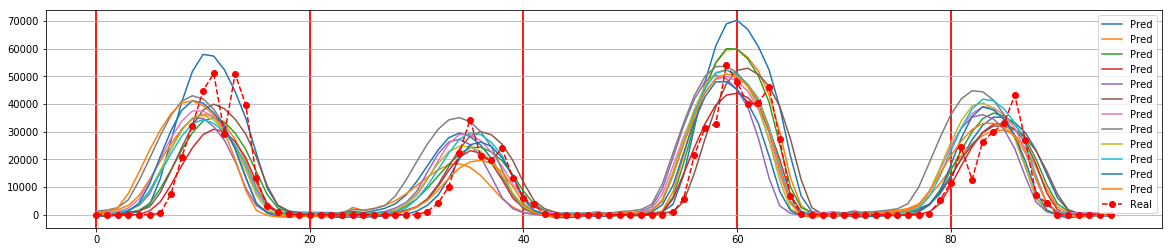

In [6]:
fig = plt.figure(figsize=(20,4))
#ax = fig.add_subplot(1,1,1)                                                      

#pred1= model[i].predict(X_test[:,:,:2+(i+1)*2])

#print(pred1.shape)
#ax = fig.add_subplot(1,1,1)
# This is where I manually set ticks. Can I use Datetime data instead???                                     
major_ticks = np.arange(0, len(predi)+1, 24)
minor_ticks = np.arange(0, len(predi)+1, 1)

for i in range(nr):                 
    predi=pred[i]
    plt.plot(predi,  label = 'Pred') 
plt.plot(data_hr1[-len(predi):,0],marker='o',ls='--',c='r', label = 'Real')
plt.legend()
#plt.set_title('model'+str(i+1))
#plt.set_xticks(major_ticks)                                                       
#plt.set_xticks(minor_ticks, minor=True)
plt.grid(which='both')                                                                                           
plt.grid(which='minor', alpha=0.3)                                                
plt.grid(which='major', alpha=1.0,linewidth=1.8,color='r',axis='x')
plt.show()

In [25]:
y_true.shape

(96,)

In [17]:
7*24

168

In [18]:
len(pred)

12

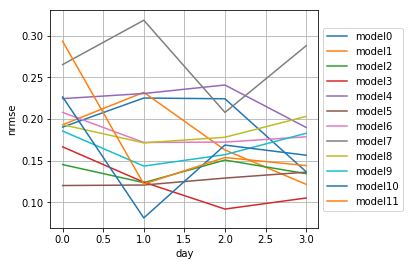

In [26]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

#rmse/max
y_true=sc1.inverse_transform(y_test[:,:,0]).flatten()[-len(predi):]

nrmse=[]
for j in range(len(pred)):
    nrmsei=[]
    for i in range(4):
        r=np.sqrt(mean_squared_error(y_true[i*24:(i+1)*24],pred[j][i*24:(i+1)*24]))
        nrmsei.append(r/np.max(y_true[i*24:(i+1)*24]))
    nrmse.append(nrmsei)
nrmse=np.array(nrmse);nrmse.shape

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(nrmse)):
    ax.plot(nrmse[i],label="model"+str(i))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.ylabel("nrmse")
plt.xlabel("day")
plt.show()

In [28]:
y_true=sc1.inverse_transform(y_test[:,:,0]).flatten()[-len(predi):]
y_true.shape

rmse=[]
nrmse_max=[]
nrmse_mean=[]
nrmse_std=[]
nrmse_iqr=[]
wape=[]
for i in range(len(pred)):
    r=np.sqrt(mean_squared_error(y_true,pred[i]))
    rmse.append(r)
    nrmse_max.append(r/np.max(y_true))
    nrmse_mean.append(r/np.mean(y_true))
    nrmse_std.append(r/np.std(y_true))
    nrmse_iqr.append(r/iqr(y_true))
    wape.append(np.mean(np.abs((y_true -pred[i])/np.mean(y_true))))
    print("model"+str(i)+"==========================")
    print('rmse: %.3f'%r)
    print('rmse/max',r/np.max(y_true))
    print('rmse/mean',r/np.mean(y_true))
    print('rmse/std',r/np.std(y_true))
    print('rmse/IQR',r/iqr(y_true))
    print('WAPE: ',wape[i])
error_list=[nrmse_max,nrmse_mean,nrmse_std,nrmse_iqr,wape]

model0==========================
rmse: 9163.084
rmse/max 0.1690605919274475
rmse/mean 0.8518021418775006
rmse/std 0.5821338260352854
rmse/IQR 0.43222094728621013
WAPE:  0.549786396353522
model1==========================
rmse: 8143.138
rmse/max 0.15024239476474013
rmse/mean 0.7569877296793802
rmse/std 0.5173362940467874
rmse/IQR 0.3841102734079677
WAPE:  0.5024790384952519
model2==========================
rmse: 6575.586
rmse/max 0.12132077401729872
rmse/mean 0.6112677944870812
rmse/std 0.417749196019384
rmse/IQR 0.3101691486668675
WAPE:  0.3753530507405383
model3==========================
rmse: 5820.089
rmse/max 0.1073817246263013
rmse/mean 0.5410366898185058
rmse/std 0.369752249712947
rmse/IQR 0.2745325223936571
WAPE:  0.29426399800880637
model4==========================
rmse: 10371.618
rmse/max 0.19135826101419412
rmse/mean 0.9641476747448967
rmse/std 0.6589123778500513
rmse/IQR 0.48922725221553404
WAPE:  0.5967871869479605
model5==========================
rmse: 5872.438
rmse/max 0.10

/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


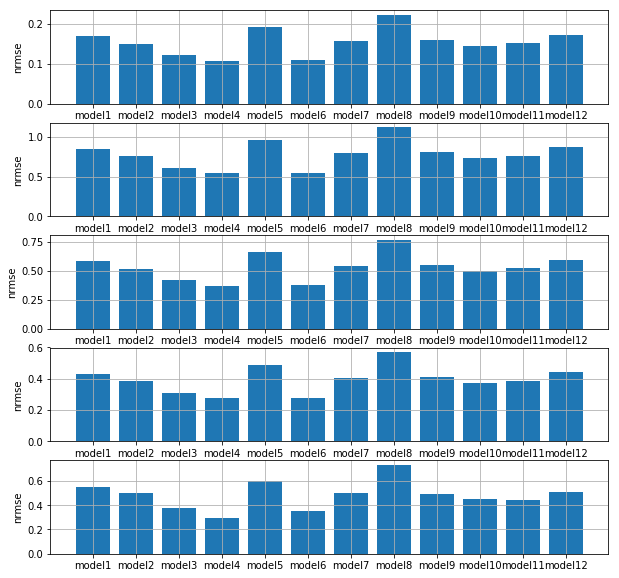

In [29]:
#max nrmse
'''plt.figure(figsize=(10,2))
plt.bar(["model"+str(i+1) for i in range(12)],wape)
plt.grid()
plt.show()'''

fig=plt.figure(figsize=(10,2*5))
for i in range(5):
    fig.add_subplot(5,1,i+1).bar(["model"+str(i+1) for i in range(12)],error_list[i])
    #fig.add_subplot(5,1,1).set_title('wape')
    fig.add_subplot(5,1,i+1).set_ylabel("nrmse")
    fig.add_subplot(5,1,i+1).grid()
plt.show()